In [1]:
cd(expanduser("/project/minus3-simulation/code/DemoInfer.jl/example"))
Base.init_active_project()
pwd(), Base.active_project(), gethostname()

("/project/minus3-simulation/code/DemoInfer.jl/example", "/project/minus3-simulation/code/DemoInfer.jl/Project.toml", "folsomprisonblues.molgen.mpg.de")

In [2]:
using DemoInfer

[ Info: Precompiling DemoInfer [50651ce3-0423-45d2-b99c-8ea4267d2717] (cache misses: wrong dep version loaded (2))


In [8]:
using HistogramBinnings, PopSimIBX
using PyPlot

## data

In [5]:
pop = VaryingPopulation(;
    genome_length = 1_000_000_000, 
    mutation_rate = 2.36e-8, recombination_rate = 1e-8,
    population_sizes = [10_000, 2000, 10_000],
    times = [0, 10_000, 12000],
)
ĥ = HistogramBinnings.Histogram(LogEdgeVector(lo = 30, hi = 1_000_000, nbins = 200));
append!(ĥ, IBSIterator(SMCprime.IBDIterator(pop), pop.mutation_rate))

StatsBase.Histogram{Int64, 1, Tuple{LogEdgeVector{Int64}}}
edges:
  LogEdgeVector{Int64}: [30, 31, 33, 35, 36, 38, 41, 43, 45, 47, 50, 53, 56, 59, 62, 65, 69, 72, 76, 80, 84, 89, 94, 99, 104, 110, 116, 122, 128, 135, 143, 150, 158, 167, 176, 185, 195, 205, 217, 228, 240, 253, 267, 281, 296, 312, 329, 346, 365, 384, 405, 427, 449, 473, 499, 525, 554, 583, 614, 647, 682, 718, 757, 797, 840, 885, 932, 982, 1034, 1090, 1148, 1209, 1274, 1342, 1414, 1490, 1569, 1653, 1741, 1835, 1933, 2036, 2145, 2260, 2380, 2508, 2642, 2783, 2932, 3088, 3253, 3427, 3611, 3804, 4007, 4221, 4447, 4685, 4935, 5199, 5477, 5769, 6078, 6403, 6745, 7106, 7485, 7886, 8307, 8751, 9219, 9712, 10231, 10778, 11354, 11961, 12600, 13274, 13983, 14731, 15518, 16347, 17221, 18142, 19112, 20133, 21209, 22343, 23537, 24795, 26121, 27517, 28988, 30537, 32169, 33889, 35700, 37609, 39619, 41737, 43967, 46318, 48793, 51401, 54149, 57043, 60092, 63304, 66688, 70253, 74008, 77964, 82131, 86521, 91146, 96017, 101150, 106556, 11225

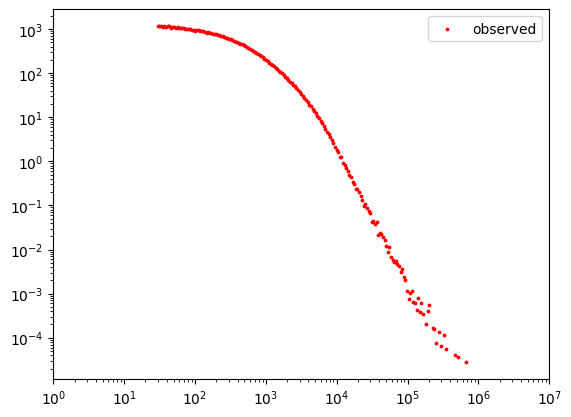

In [9]:
DemoInfer.plot_hist(ĥ; s=3, color="red", label="observed")

legend()
xlim(1e0,1e7)
xscale("log")
yscale("log")

## fit

In [10]:
res = DemoInfer.sequential_fit(ĥ, 2.36e-8, 3)

LoadError: UndefVarError: `EpochModel` not defined in `MLDs`
Suggestion: check for spelling errors or missing imports.

In [156]:
map(x -> x.opt.evidence, res)

7-element Vector{Float64}:
 -12875.67105412592
  -3658.520555427681
  -1840.8522367815738
  -1437.7565263747415
  -1170.0630352476815
  -1054.5314209336182
  -1164.4592055481587

In [166]:
res, chains = massip_procedure(ĥ, 6, μ, ρ, start = 1, maxiters = 1, final_factor=100)

─────────────────────────────────────────────────────────────────────────────
              Coef.  Std. Error        z  Pr(>|z|)     Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────
TN[1]     2.10907e9   2.92721e6  720.504       0.0     2.10333e9     2.1148e9
TN[2]  8102.31        9.58282    845.503       0.0  8083.53       8121.09
─────────────────────────────────────────────────────────────────────────────
log-evidence: -13907.759168683298
───────────────────────────────────────────────────────────────────────────────
              Coef.  Std. Error         z  Pr(>|z|)     Lower 95%     Upper 95%
───────────────────────────────────────────────────────────────────────────────
TN[1]     2.73812e9   8.51659e6  321.504        0.0     2.72143e9     2.75481e9
TN[2]  8723.03       12.0501     723.895        0.0  8699.41       8746.65
TN[3]  1938.68       25.6642      75.5401       0.0  1888.37       1988.98
TN[4]  2082.6        28.0375    

┌ Warning:     Optimization did not converge! You may need to correct your model or adjust the
│     Optim parameters.
└ @ TuringOptimExt ~/.julia/packages/Turing/QN7BL/ext/TuringOptimExt.jl:182
┌ Warning:     Optimization did not converge! You may need to correct your model or adjust the
│     Optim parameters.
└ @ TuringOptimExt ~/.julia/packages/Turing/QN7BL/ext/TuringOptimExt.jl:182


──────────────────────────────────────────────────────────────────────────────────────────
                Coef.    Std. Error          z      Pr(>|z|)      Lower 95%      Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────
TN[1]       2.68449e9     9.05946e6  296.319    0.0               2.66673e9      2.70225e9
TN[2]   22756.3         846.23        26.8914   2.77182e-159  21097.7        24414.9
TN[3]   24526.3        5616.53         4.3668   1.26079e-5    13518.1        35534.5
TN[4]    5989.51        604.157        9.91382  3.62521e-23    4805.38        7173.63
TN[5]   19760.7        2626.48         7.52364  5.32724e-14   14612.9        24908.5
TN[6]    9101.36        106.315       85.6077   0.0            8892.99        9309.73
TN[7]     517.352       246.71         2.09701  0.0359928        33.8101      1000.89
TN[8]     826.923       321.297        2.5737   0.0100618       197.191       1456.65
TN[9]     733.733       121.89       

┌ Warning:     Optimization did not converge! You may need to correct your model or adjust the
│     Optim parameters.
└ @ TuringOptimExt ~/.julia/packages/Turing/QN7BL/ext/TuringOptimExt.jl:182
┌ Warning:     Optimization did not converge! You may need to correct your model or adjust the
│     Optim parameters.
└ @ TuringOptimExt ~/.julia/packages/Turing/QN7BL/ext/TuringOptimExt.jl:182
┌ Warning:     Optimization did not converge! You may need to correct your model or adjust the
│     Optim parameters.
└ @ TuringOptimExt ~/.julia/packages/Turing/QN7BL/ext/TuringOptimExt.jl:182
┌ Warning:     Optimization did not converge! You may need to correct your model or adjust the
│     Optim parameters.
└ @ TuringOptimExt ~/.julia/packages/Turing/QN7BL/ext/TuringOptimExt.jl:182
┌ Warning:     Optimization did not converge! You may need to correct your model or adjust the
│     Optim parameters.
└ @ TuringOptimExt ~/.julia/packages/Turing/QN7BL/ext/TuringOptimExt.jl:182
┌ Warning:     Optimizati

nothing
log-evidence: -1188.2536075292428


(Any[Fit stationary (binned 200) L-BFGS ● [2.1e+09 ,8102.3] -13892.989, Fit 2 epochs (binned 200) L-BFGS ● [2.7e+09 ,8723.0 ,1938.7 ,2082.6] -2871.598, Fit 3 epochs (binned 200) L-BFGS ● [2.8e+09 ,37092.6 ,72530.6 ,8212.0 ,1718.1 ,1995.0] -1375.555, Fit 4 epochs (binned 200) L-BFGS ● [2.8e+09 ,23521.8 ,74654.0 ,66082.0 ,74654.0 ,8188.8 ,1707.3 ,1994.2] -1359.802, Fit 5 epochs (binned 200) L-BFGS ● [2.7e+09 ,22756.3 ,24526.3 ,5989.5 ,19760.7 ,9101.4 ,517.4 ,826.9 ,733.7 ,4188.1] -1001.902, Fit 6 epochs (binned 200) L-BFGS ● [2.8e+09 ,24073.3 ,10.0 ,99818.6 ,36101.7 ,6576.8 ,10.0 ,99994.9 ,12746.8 ,9909.8 ,1997.4 ,2037.2] -1143.404], Any[[2.1606516006161394e9 7895.278519821648; 2.1020695914213722e9 8099.548364935639], [2.75449841615094e9 8542.790764300506 2335.621034830335 2427.9425372376077; 2.7552163743309913e9 8728.667524692453 1917.6422196403564 2022.9770120298995], [2.7889312432785606e9 16036.290503077287 … 1861.463778098974 2262.73207137247; 2.773661271042364e9 35728.851333607134 …

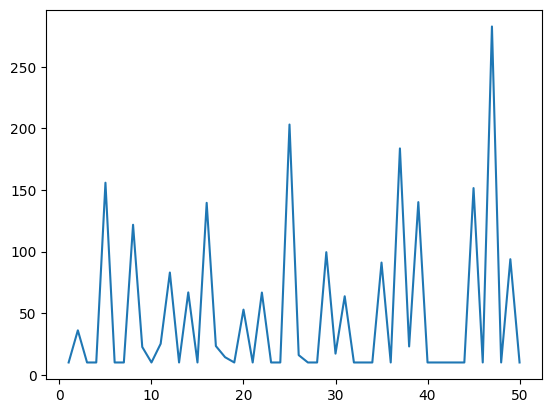

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f221f081db0>

In [26]:
temp = chains[5][:,10]
plot(eachindex(temp), temp)

In [169]:
NA20752_trevor = res

6-element Vector{Any}:
 Fit stationary (binned 200) L-BFGS ● [2.1e+09 ,8102.3] -13892.989
 Fit 2 epochs (binned 200) L-BFGS ● [2.7e+09 ,8723.0 ,1938.7 ,2082.6] -2871.598
 Fit 3 epochs (binned 200) L-BFGS ● [2.8e+09 ,37092.6 ,72530.6 ,8212.0 ,1718.1 ,1995.0] -1375.555
 Fit 4 epochs (binned 200) L-BFGS ● [2.8e+09 ,23521.8 ,74654.0 ,66082.0 ,74654.0 ,8188.8 ,1707.3 ,1994.2] -1359.802
 Fit 5 epochs (binned 200) L-BFGS ● [2.7e+09 ,22756.3 ,24526.3 ,5989.5 ,19760.7 ,9101.4 ,517.4 ,826.9 ,733.7 ,4188.1] -1001.902
 Fit 6 epochs (binned 200) L-BFGS ● [2.8e+09 ,24073.3 ,10.0 ,99818.6 ,36101.7 ,6576.8 ,10.0 ,99994.9 ,12746.8 ,9909.8 ,1997.4 ,2037.2] -1143.404

In [170]:
serialize("/project/minus3-simulation-data/representative_fits/NA20752_trevor", NA20752_trevor)

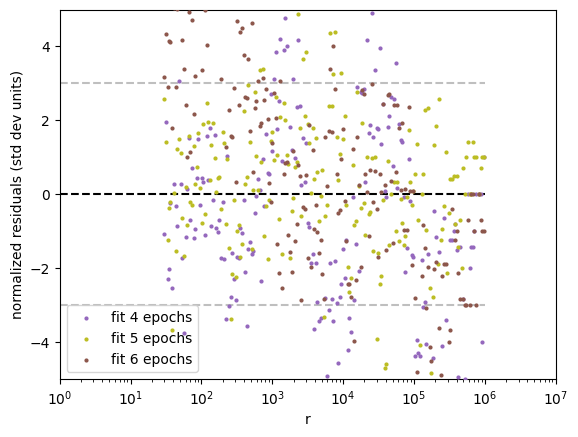

PyObject <matplotlib.legend.Legend object at 0x7fdf069d8760>

In [168]:
mask = 4:6
for (f,j) in zip(res[mask],eachindex(res[mask]))
    h = HistogramBinnings.Histogram(ĥ.edges)
    get_sim!(f.para, h, μ, ρ, factor=1)
    nepochs = Int(length(f.para)/2)
    c = "tab:" .* split("blue orange red purple olive brown cyan pink")[nepochs]
    residuals = (ĥ.weights .- h.weights) ./ sqrt.(ĥ.weights) 
    x_ = x[(ŷ .!= 0).&(x.>1e0)]
    y_ = residuals[(ŷ .!= 0).&(x.>1e0)]
    scatter(x_, y_,s=4,color=c,label="fit $(f.nepochs) epochs",zorder=2+nepochs)
    # x, y = xy(h)
    # scatter(x,y,s=4)
end

# scatter(x_, y_,s=4)
plot([1e0,1e6],[0,0],color="black",linestyle="--")
plot([1e0,1e6],[3,3],color="grey",linestyle="--",alpha=0.5)
plot([1e0,1e6],[-3,-3],color="grey",linestyle="--",alpha=0.5)

xscale("log")
xlabel("r")
ylim(-5,5)
xlim(1e0,1e7)
ylabel("normalized residuals (std dev units)")
legend(loc="lower left")

# xscale("log")
# yscale("log")

# savefig("3rd_res.pdf",bbox_inches="tight")

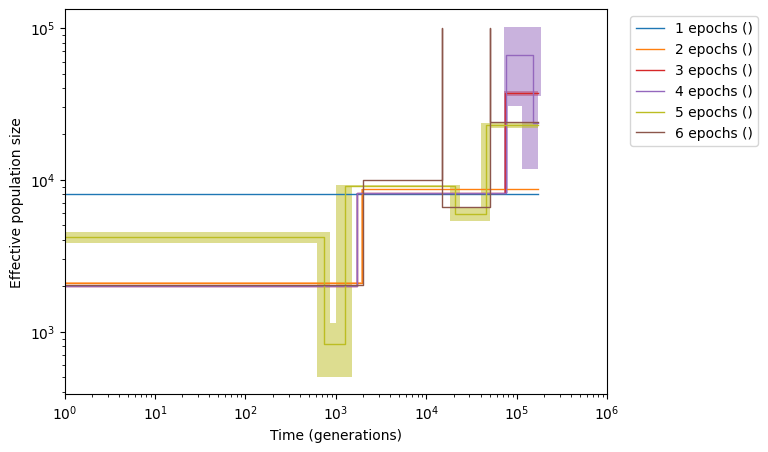

PyObject <matplotlib.legend.Legend object at 0x7fdf06b93910>

In [167]:
_, ax = subplots(figsize=(7, 5))
mask = 1:6
plot_demography(mask, res[mask], ax, tail=20000, id="")
# plot_profile(res[1], res[2], ax, tail=5000, id="")
yscale("log")
ax.set_xlabel("Time (generations)")
ax.set_ylabel("Effective population size")
ax.set_xlim(1, 1000_000)
ax.set_xscale("log")
legend(bbox_to_anchor=(1.03, 1), loc="upper left")

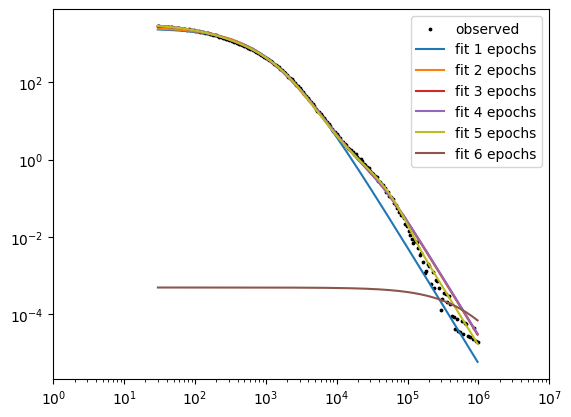

PyObject <matplotlib.legend.Legend object at 0x7fedd8645660>

In [163]:
plot_hist(ĥ; s=3, color="black", label="observed")

for (f,j) in zip(res,eachindex(res))
    x, ŷ = xy(ĥ)
    y_th = map(i->hid(f.para, μ, i), x)
    nepochs = Int(length(f.para)/2)
    c = "tab:" .* split("blue orange red purple olive brown cyan pink")[nepochs÷8+nepochs%8]
    plot(x,y_th,color=c,label="fit $(f.nepochs) epochs",zorder=2+nepochs)
end

xlim(1e0,1e7)
xscale("log")
yscale("log")
legend()

uncorrected plots

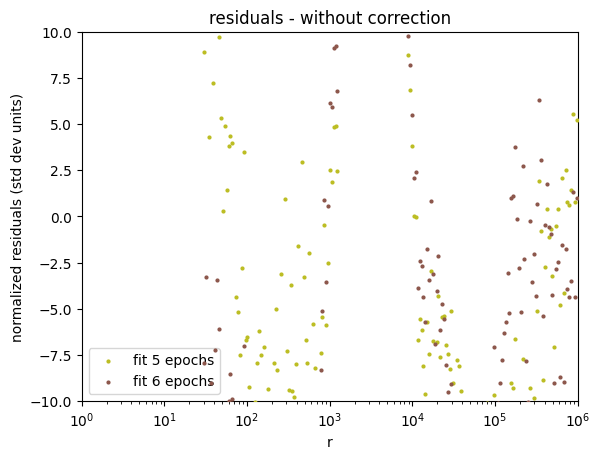

PyObject <matplotlib.legend.Legend object at 0x7fe79101bd90>

In [181]:
mask = 5:6
for (f,j) in zip(res[mask],eachindex(res[mask]))
    x, ŷ = xy(ĥ)
    widths = ĥ.edges[1][2:end] - ĥ.edges[1][1:end-1]
    y_th = map(i->hid(f.para, μ, i), x) .* widths
    # y_th = map(i->hid([1_000_000_000, 10000], 2.36e-8, i), x) .* widths
    nepochs = Int(length(f.para)/2)
    c = "tab:" .* split("blue orange red purple olive brown cyan pink")[nepochs÷8+nepochs%8]
    residuals = (ĥ.weights .- y_th) ./ sqrt.(ĥ.weights)
    # residuals = ŷ .- y_th
    # println(x[residuals .> 1])
    x_ = x[(ŷ .!= 0).&(x.>1e0)]
    y_ = residuals[(ŷ .!= 0).&(x.>1e0)]
    scatter(x_, y_,s=4,color=c,label="fit $(f.nepochs) epochs",zorder=2+nepochs)
end

xscale("log")
xlabel("r")
ylim(-10,10)
xlim(1e0,1e6)
title("residuals - without correction")
ylabel("normalized residuals (std dev units)")
legend(loc="lower left")

## comparing individuals

In [172]:
# telugu_all = deserialize("/project/minus3-simulation-data/representative_fits/telugu_all");
# tuscan_all = deserialize("/project/minus3-simulation-data/representative_fits/tuscan_all");
# esan_all = deserialize("/project/minus3-simulation-data/representative_fits/esan_all");
telugu = deserialize("/project/minus3-simulation-data/representative_fits/telugu");
tuscan = deserialize("/project/minus3-simulation-data/representative_fits/tuscan");
esan = deserialize("/project/minus3-simulation-data/representative_fits/esan");
japanese = deserialize("/project/minus3-simulation-data/representative_fits/japanese");
prican = deserialize("/project/minus3-simulation-data/representative_fits/prican");
luhya = deserialize("/project/minus3-simulation-data/representative_fits/luhya");
mende = deserialize("/project/minus3-simulation-data/representative_fits/mende");
esan_t2t = deserialize("/project/minus3-simulation-data/representative_fits/esan_t2t");
tuscan_t2t = deserialize("/project/minus3-simulation-data/representative_fits/tuscan_t2t");
telugu_t2t = deserialize("/project/minus3-simulation-data/representative_fits/telugu_t2t");
japanese_t2t = deserialize("/project/minus3-simulation-data/representative_fits/japanese_t2t");
esan_all_t2t = deserialize("/project/minus3-simulation-data/representative_fits/esan_all_t2t");
tuscan_all_t2t = deserialize("/project/minus3-simulation-data/representative_fits/tuscan_all_t2t");
telugu_all_t2t = deserialize("/project/minus3-simulation-data/representative_fits/telugu_all_t2t");
esan_tr = deserialize("/project/minus3-simulation-data/representative_fits/HG03267_trevor");
tuscan_tr = deserialize("/project/minus3-simulation-data/representative_fits/NA20752_trevor");

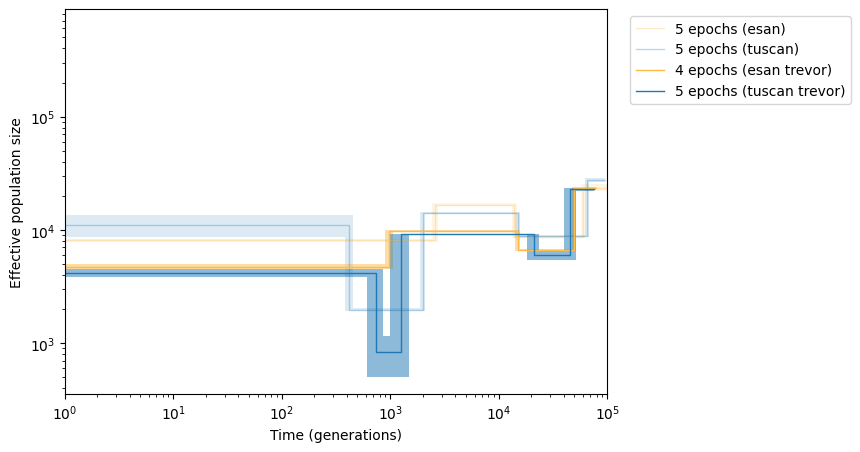

PyObject <matplotlib.legend.Legend object at 0x7fdf06345210>

In [175]:
_, ax = subplots(figsize=(7, 5))
afr_c = get_cmap("YlOrBr")
mask_esan = 5:5
mask_tuscan = 5:5
mask_telugu = 6:6
mask_japanese = 5:5
mask_prican = 5:5
mask_luhya = 5:5
mask_mende = 5:5
plot_demography(mask_esan, esan[mask_esan], ax, tail=30_000, id="esan", c=afr_c(0.4), alp=0.3)
# plot_demography(mask_luhya, luhya[mask_luhya], ax, tail=30_000, id="luhya", c=afr_c(0.5), alp=0.3)
# plot_demography(mask_mende, mende[mask_mende], ax, tail=30_000, id="mende", c=afr_c(0.6), alp=0.3)
plot_demography(mask_tuscan, tuscan[mask_tuscan], ax, tail=30_000, id="tuscan", c="tab:blue", alp=0.3)
# plot_demography(mask_telugu, telugu[mask_telugu], ax, tail=30_000, id="telugu", c="tab:purple", alp=0.3)
# plot_demography(mask_japanese, japanese[mask_japanese], ax, tail=30_000, id="japanese", c="tab:green", alp=0.3)
# plot_demography(mask_prican, prican[mask_prican], ax, tail=30_000, id="puerto rican", c="tab:red", alp=0.3)
# plot_demography([6], esan_all, ax, tail=25_000, id="esan all", c="tab:cyan")
# plot_demography([6], tuscan_all, ax, tail=25_000, id="tuscan all", c="tab:olive")
# plot_demography([8], telugu_all, ax, tail=25_000, id="telugu all", c="tab:purple")
# plot_demography(5:5, esan_t2t[5:5], ax, tail=30_000, id="esan T2T", c=afr_c(0.4), alp=0.3)
# plot_demography(5:5, tuscan_t2t[5:5], ax, tail=30_000, id="tuscan T2T", c="tab:blue", alp=0.3)
# plot_demography(6:6, telugu_t2t[6:6], ax, tail=30_000, id="telugu T2T", c="tab:purple")
# plot_demography(5:5, japanese_t2t[5:5], ax, tail=30_000, id="japanese T2T", c="tab:green")
# plot_demography(6:6, esan_all_t2t[6:6], ax, tail=30_000, id="esan all T2T", c=afr_c(0.4))
# plot_demography(7:7, tuscan_all_t2t[7:7], ax, tail=30_000, id="tuscan all T2T", c="tab:blue")
# plot_demography(6:6, telugu_all_t2t[6:6], ax, tail=30_000, id="telugu all T2T", c="tab:purple")
plot_demography(4:4, esan_tr[4:4], ax, tail=30_000, id="esan trevor", c=afr_c(0.4))
plot_demography(5:5, tuscan_tr[5:5], ax, tail=30_000, id="tuscan trevor", c="tab:blue")
yscale("log")
ax.set_xlabel("Time (generations)")
ax.set_ylabel("Effective population size")
ax.set_xlim(1, 100_000)
ax.set_xscale("log")
legend(bbox_to_anchor=(1.03, 1), loc="upper left")

## Invariance of correction wrt demographic history

In [136]:
TN = [10_000_000_000, 1000, 400, 200, 500, 1000]
TN2 = [10_000_000_000, 600, 100, 50, 300, 1000]
TN3 = [10_000_000_000, 1000, 1000, 500, 800, 2000]
TN4 = [10_000_000_000, 1000]
TN5 = [10_000_000_000, 2000]
TN6 = [10_000_000_000, 80000, 100000, 100000, 10000, 20000, 300, 500]

Ns = reverse(TN[2:2:end])
Ts = cumsum(reverse([TN[3:2:end];0]))
L = TN[1]
pop = VaryingPopulation(;
    genome_length = L, 
    mutation_rate = 1e-7, recombination_rate = 1e-7,
    population_sizes = Ns,
    times = Ts,
)
Ns = reverse(TN2[2:2:end])
Ts = cumsum(reverse([TN2[3:2:end];0]))
L = TN2[1]
pop2 = VaryingPopulation(;
    genome_length = L, 
    mutation_rate = 1e-7, recombination_rate = 1e-7,
    population_sizes = Ns,
    times = Ts,
)
Ns = reverse(TN3[2:2:end])
Ts = cumsum(reverse([TN3[3:2:end];0]))
L = TN3[1]
pop3 = VaryingPopulation(;
    genome_length = L, 
    mutation_rate = 1e-7, recombination_rate = 1e-7,
    population_sizes = Ns,
    times = Ts,
)
Ns = reverse(TN4[2:2:end])
Ts = cumsum(reverse([TN4[3:2:end];0]))
L = TN4[1]
pop4 = VaryingPopulation(;
    genome_length = L, 
    mutation_rate = 1e-7, recombination_rate = 1e-7,
    population_sizes = Ns,
    times = Ts,
)
Ns = reverse(TN5[2:2:end])
Ts = cumsum(reverse([TN5[3:2:end];0]))
L = TN5[1]
pop5 = VaryingPopulation(;
    genome_length = L, 
    mutation_rate = 1e-7, recombination_rate = 1e-7,
    population_sizes = Ns,
    times = Ts,
)
Ns = reverse(TN6[2:2:end])
Ts = cumsum(reverse([TN6[3:2:end];0]))
L = TN6[1]
pop6 = VaryingPopulation(;
    genome_length = L, 
    mutation_rate = 1e-7, recombination_rate = 1e-7,
    population_sizes = Ns,
    times = Ts,
)

h = HistogramBinnings.Histogram(LogEdgeVector(lo = 1, hi = 1_000_000, nbins = 200));
append!(h, IBSIterator(SMCprime.IBDIterator(pop), pop.mutation_rate))
x, y = xy(h)
widths = h.edges[1][2:end] - h.edges[1][1:end-1]
errs = sqrt.(h.weights) ./ widths;

h = HistogramBinnings.Histogram(LogEdgeVector(lo = 1, hi = 1_000_000, nbins = 200));
append!(h, IBSIterator(SMCprime.IBDIterator(pop2), pop2.mutation_rate))
x, y2 = xy(h)
errs2 = sqrt.(h.weights) ./ widths;

h = HistogramBinnings.Histogram(LogEdgeVector(lo = 1, hi = 1_000_000, nbins = 200));
append!(h, IBSIterator(SMCprime.IBDIterator(pop3), pop3.mutation_rate))
x, y3 = xy(h)
errs3 = sqrt.(h.weights) ./ widths;

h = HistogramBinnings.Histogram(LogEdgeVector(lo = 1, hi = 1_000_000, nbins = 200));
append!(h, IBSIterator(SMCprime.IBDIterator(pop4), pop4.mutation_rate))
x, y4 = xy(h)
errs4 = sqrt.(h.weights) ./ widths;

h = HistogramBinnings.Histogram(LogEdgeVector(lo = 1, hi = 1_000_000, nbins = 200));
append!(h, IBSIterator(SMCprime.IBDIterator(pop5), pop5.mutation_rate))
x, y5 = xy(h)
errs5 = sqrt.(h.weights) ./ widths;

h = HistogramBinnings.Histogram(LogEdgeVector(lo = 1, hi = 1_000_000, nbins = 200));
append!(h, IBSIterator(SMCprime.IBDIterator(pop6), pop6.mutation_rate))
x, y6 = xy(h)
errs6 = sqrt.(h.weights) ./ widths;

In [137]:
using LinearAlgebra

function Ntt(Ts::Vector, Ns::Vector, tinf::Number, tsup::Number)
    # Ts times of epoch start, from present to past, starting at 0, in units of 2N0
    # Ns sizes of epochs, from present to past, in units of N0
    tinf > 0 ? epoch_inf = searchsortedfirst(Ts, tinf) - 1 : epoch_inf = 1
    epoch_sup = searchsortedfirst(Ts, tsup) - 1
    if epoch_inf == epoch_sup
        return 1/2Ns[epoch_inf] * (tsup - tinf)
    else
        sum = 0.
        for i in epoch_inf:epoch_sup
            if i == epoch_inf
                sum += 1/2Ns[i] * (Ts[i+1] - tinf)
            elseif i == epoch_sup
                sum += 1/2Ns[i] * (tsup - Ts[i])
            else
                sum += 1/2Ns[i] * (Ts[i+1] - Ts[i])
            end
        end
        return sum
    end
end

function Ntt(Ts::Vector, Ns::Vector, t::Number)
    epoch = searchsortedfirst(Ts, t) - 1
    return 1/2Ns[epoch]
end

function mean_time(TN)
    Ns = TN[2:2:end]
    Ts = [TN[3:2:end];0]
    N0 = TN[2]
    Ns = reverse(Ns) ./ N0
    Ts = cumsum(reverse(Ts)) ./ 2N0
    
    t = 1/2N0 : 1/2N0 : 40.
    dt = [1/2N0 for _ in t]
    f(u) = u*exp(-Ntt(Ts,Ns,0.,u))*Ntt(Ts,Ns,u)

    return dot(f.(t), dt) * N0
end



mean_time (generic function with 1 method)

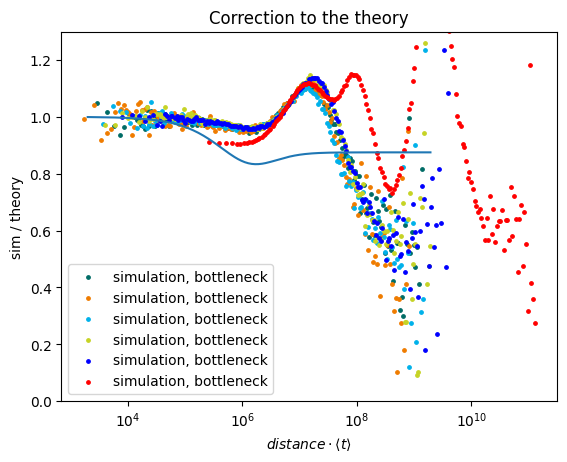

PyObject <matplotlib.legend.Legend object at 0x7fc7b65713f0>

In [138]:
μ = 1e-7
ρ = 1e-7

y_th = map(x) do r 
    hid(TN, μ, r)
end
# res = (y .- y_th) ./ errs / sum(y .* widths)
res = y ./ y_th
meanN = mean_time(TN)
x_ = x[(y .!= 0).&(x.>1e0)] * meanN
y_ = res[(y .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="simulation, bottleneck", c="#006c66")

y_th = map(x) do r 
    hid(TN2, μ, r)
end
# res = (y2 .- y_th) ./ errs2 / sum(y2 .* widths)
res = y2 ./ y_th
meanN2 = mean_time(TN2)
x_ = x[(y2 .!= 0).&(x.>1e0)] * meanN2
y_ = res[(y2 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="simulation, bottleneck", c="#ef7c00")

y_th = map(x) do r 
    hid(TN3, μ, r)
end
# res = (y3 .- y_th) ./ errs3 / sum(y3 .* widths)
res = y3 ./ y_th
meanN3 = mean_time(TN3)
x_ = x[(y3 .!= 0).&(x.>1e0)] * meanN3
y_ = res[(y3 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="simulation, bottleneck", c="#00b1ea")

y_th = map(x) do r 
    hid(TN4, μ, r)
end
# res = (y3 .- y_th) ./ errs3 / sum(y3 .* widths)
res = y4 ./ y_th
meanN4 = mean_time(TN4)
x_ = x[(y4 .!= 0).&(x.>1e0)] * meanN4
y_ = res[(y4 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="simulation, bottleneck", c="#c6d325")

y_th = map(x) do r 
    hid(TN5, μ, r)
end
# res = (y3 .- y_th) ./ errs3 / sum(y3 .* widths)
res = y5 ./ y_th
meanN5 = mean_time(TN5)
x_ = x[(y5 .!= 0).&(x.>1e0)] * meanN5
y_ = res[(y5 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="simulation, bottleneck", c="blue")

y_th = map(x) do r 
    hid(TN6, μ, r)
end
# res = (y3 .- y_th) ./ errs3 / sum(y3 .* widths)
res = y6 ./ y_th
meanN6 = mean_time(TN6)
x_ = x[(y6 .!= 0).&(x.>1e0)] * meanN6
y_ = res[(y6 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="simulation, bottleneck", c="red")

correction(x, tau) = (1 + 4μ*tau*x)^3 / (1 + 4(μ+ρ)*tau*x)^3 * (1 + sum(((4(μ+ρ)*tau*x)/(1 + 4(μ+ρ)*tau*x))^i for i in 1:6))
plot(x*meanN4, correction.(x, meanN4))

# scatter(x_, y_,s=4)
# plot([1e0,1e8],[0,0],color="black",linestyle="--")
# plot([1e0,1e8],[3,3],color="grey",linestyle="--",label=L"\pm3\sigma",alpha=0.5)
# plot([1e0,1e8],[-3,-3],color="grey",linestyle="--",alpha=0.5)

title("Correction to the theory")
xscale("log")
# yscale("log")
xlabel(L"distance \cdot \langle t \rangle")
ylim(0,1.3)
# xlim(1e0,1e6)
ylabel("sim / theory")
legend(loc="lower left")

# savefig("correction_invariance_rescaled.pdf", bbox_inches="tight")

In [92]:
function partial_like(r::Vector, counts::Vector, weights::Vector, weights_correction, mu::Float64, rho::Float64, p)
    TN = [1_000_000_000, 10000, p, 2000, 10000, 10000]
    # TN = [1_000_000_000, p]
    ll = 0
    for i in eachindex(counts)
        m = weights[i] * hid(TN, mu, r[i]) + weights_correction[i]
        if (m <= 0) || isnan(m)
            ll += -Inf
        else
            ll += logpdf(Poisson(m), counts[i])
        end
    end
    ll
end

function sim_like(r::Vector, counts::Vector, mu::Float64, rho::Float64, p)
    TN = [1_000_000_000, 10000, p, 2000, 10000, 10000]
    # TN = [1_000_000_000, p]
    weights_sim, _ = get_sim(TN, h, fits_w[3].para, 10);
    ll = 0
    for i in eachindex(counts)
        m = weights_sim[i]
        if (m <= 0) || isnan(m)
            ll += -Inf
        else
            ll += logpdf(Poisson(m), counts[i])
        end
    end
    ll
end
    

sim_like (generic function with 1 method)

In [97]:
ns = 3000:20:5000

ll_sim = map(ns) do n
    sim_like(x, ĥ.weights, μ, 1e-8, n)
end;

In [98]:
ns2 = 3000:2:5000

ll_partial = map(ns2) do n
    partial_like(x, ĥ.weights, widths, correction, μ, 1e-8, n)
end;

In [101]:
fit_sim = Polynomials.fit(ns[ll_sim .> -3000], ll_sim[ll_sim .> -3000], 2)
fit_partial = Polynomials.fit(ns2[ll_partial .> -3000], ll_partial[ll_partial .> -3000], 2)

println(fit_sim)
println(fit_partial)
println(fit_partial[2]/fit_sim[2])

-42435.5 + 20.3888*x - 0.00249631*x^2
-44039.2 + 21.1238*x - 0.00257979*x^2
1.0334421224343855


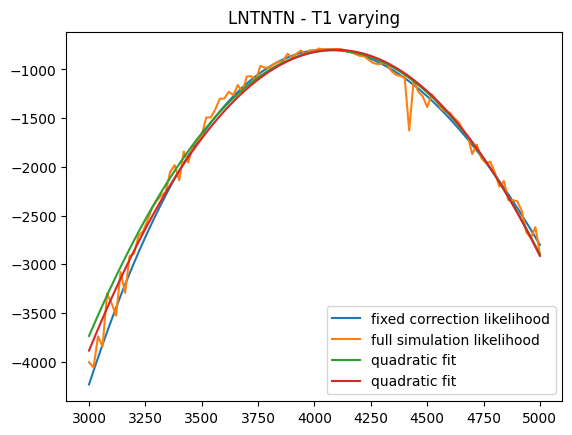

In [103]:
plot(ns2, ll_partial, label="fixed correction likelihood")
plot(ns, ll_sim, label="full simulation likelihood")
plot(ns, fit_sim.(ns), label="quadratic fit")
plot(ns2, fit_partial.(ns2), label="quadratic fit")

# ylim(-2000,-700)
# xlim(1750, 2250)

legend()

title("LNTNTN - T1 varying")
# savefig("lntntn_t1.pdf", bbox_inches="tight")

## invariance of old bottleneck position

In [300]:
TN = [10_000_000_000, 10000, 4000, 2000, 10000, 10000]
TN2 = [10_000_000_000, 10000, 4000, 2000, 20000, 10000]
TN3 = [10_000_000_000, 10000, 4000, 2000, 40000, 10000]
TN4 = [10_000_000_000, 10000, 4000, 2000, 80000, 10000]
TN5 = [10_000_000_000, 10000, 4000, 2000, 120000, 10000]
TN6 = [10_000_000_000, 10000, 4000, 2000, 160000, 10000]

Ns = reverse(TN[2:2:end])
Ts = cumsum(reverse([TN[3:2:end];0]))
L = TN[1]
pop = VaryingPopulation(;
    genome_length = L, 
    mutation_rate = 2.36e-8, recombination_rate = 1e-8,
    population_sizes = Ns,
    times = Ts,
)
Ns = reverse(TN2[2:2:end])
Ts = cumsum(reverse([TN2[3:2:end];0]))
L = TN2[1]
pop2 = VaryingPopulation(;
    genome_length = L, 
    mutation_rate = 2.36e-8, recombination_rate = 1e-8,
    population_sizes = Ns,
    times = Ts,
)
Ns = reverse(TN3[2:2:end])
Ts = cumsum(reverse([TN3[3:2:end];0]))
L = TN3[1]
pop3 = VaryingPopulation(;
    genome_length = L, 
    mutation_rate = 2.36e-8, recombination_rate = 1e-8,
    population_sizes = Ns,
    times = Ts,
)
Ns = reverse(TN4[2:2:end])
Ts = cumsum(reverse([TN4[3:2:end];0]))
L = TN4[1]
pop4 = VaryingPopulation(;
    genome_length = L, 
    mutation_rate = 2.36e-8, recombination_rate = 1e-8,
    population_sizes = Ns,
    times = Ts,
)
Ns = reverse(TN5[2:2:end])
Ts = cumsum(reverse([TN5[3:2:end];0]))
L = TN5[1]
pop5 = VaryingPopulation(;
    genome_length = L, 
    mutation_rate = 2.36e-8, recombination_rate = 1e-8,
    population_sizes = Ns,
    times = Ts,
)
Ns = reverse(TN6[2:2:end])
Ts = cumsum(reverse([TN6[3:2:end];0]))
L = TN6[1]
pop6 = VaryingPopulation(;
    genome_length = L, 
    mutation_rate = 2.36e-8, recombination_rate = 1e-8,
    population_sizes = Ns,
    times = Ts,
)

h = HistogramBinnings.Histogram(LogEdgeVector(lo = 1, hi = 1_000_000, nbins = 200));
append!(h, IBSIterator(SMCprime.IBDIterator(pop), pop.mutation_rate))
x, y = xy(h)
widths = h.edges[1][2:end] - h.edges[1][1:end-1]
errs = sqrt.(h.weights) ./ widths;
pars = sequential_fit(h, 2.36e-8, 1).para

h = HistogramBinnings.Histogram(LogEdgeVector(lo = 1, hi = 1_000_000, nbins = 200));
append!(h, IBSIterator(SMCprime.IBDIterator(pop2), pop2.mutation_rate))
x, y2 = xy(h)
errs2 = sqrt.(h.weights) ./ widths;
pars2 = sequential_fit(h, 2.36e-8, 1).para

h = HistogramBinnings.Histogram(LogEdgeVector(lo = 1, hi = 1_000_000, nbins = 200));
append!(h, IBSIterator(SMCprime.IBDIterator(pop3), pop3.mutation_rate))
x, y3 = xy(h)
errs3 = sqrt.(h.weights) ./ widths;
pars3 = sequential_fit(h, 2.36e-8, 1).para

h = HistogramBinnings.Histogram(LogEdgeVector(lo = 1, hi = 1_000_000, nbins = 200));
append!(h, IBSIterator(SMCprime.IBDIterator(pop4), pop4.mutation_rate))
x, y4 = xy(h)
errs4 = sqrt.(h.weights) ./ widths;
pars4 = sequential_fit(h, 2.36e-8, 1).para

h = HistogramBinnings.Histogram(LogEdgeVector(lo = 1, hi = 1_000_000, nbins = 200));
append!(h, IBSIterator(SMCprime.IBDIterator(pop5), pop5.mutation_rate))
x, y5 = xy(h)
errs5 = sqrt.(h.weights) ./ widths;
pars5 = sequential_fit(h, 2.36e-8, 1).para

h = HistogramBinnings.Histogram(LogEdgeVector(lo = 1, hi = 1_000_000, nbins = 200));
append!(h, IBSIterator(SMCprime.IBDIterator(pop6), pop6.mutation_rate))
x, y6 = xy(h)
errs6 = sqrt.(h.weights) ./ widths;
pars6 = sequential_fit(h, 2.36e-8, 1).para

2-element Vector{Float64}:
    1.0239948026872253e10
 9769.873689404983

comparing with the recent/ancestral stationary population

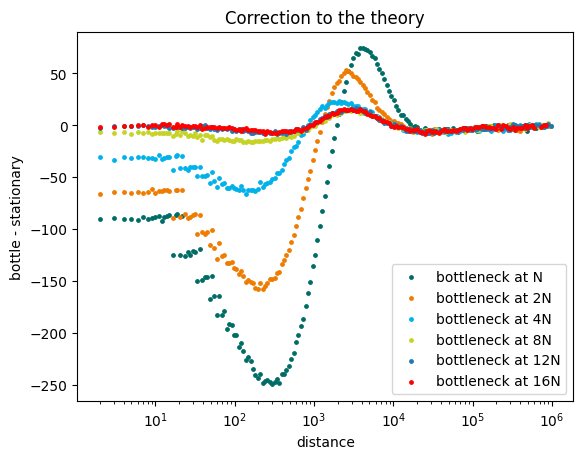

PyObject <matplotlib.legend.Legend object at 0x7f21c05b5690>

In [307]:
μ = 2.36e-8

y_th = map(x) do r 
    hid([10_000_000_000, 10000], μ, r)
end
res = (y .- y_th) ./ errs
# res = y ./ y_th
x_ = x[(y .!= 0).&(x.>1e0)] 
y_ = res[(y .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="bottleneck at N", c="#006c66")

y_th = map(x) do r 
    hid([10_000_000_000, 10000], μ, r)
end
res = (y2 .- y_th) ./ errs2
# res = y2 ./ y_th
x_ = x[(y2 .!= 0).&(x.>1e0)]
y_ = res[(y2 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="bottleneck at 2N", c="#ef7c00")

y_th = map(x) do r 
    hid([10_000_000_000, 10000], μ, r)
end
res = (y3 .- y_th) ./ errs3
# res = y3 ./ y_th
x_ = x[(y3 .!= 0).&(x.>1e0)]
y_ = res[(y3 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="bottleneck at 4N", c="#00b1ea")

y_th = map(x) do r 
    hid([10_000_000_000, 10000], μ, r)
end
res = (y4 .- y_th) ./ errs4
# res = y4 ./ y_th
x_ = x[(y4 .!= 0).&(x.>1e0)]
y_ = res[(y4 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="bottleneck at 8N", c="#c6d325")

y_th = map(x) do r 
    hid([10_000_000_000, 10000], μ, r)
end
res = (y5 .- y_th) ./ errs5 
# res = y5 ./ y_th
x_ = x[(y5 .!= 0).&(x.>1e0)]
y_ = res[(y5 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="bottleneck at 12N")

y_th = map(x) do r 
    hid([10_000_000_000, 10000], μ, r)
end
res = (y6 .- y_th) ./ errs6
# res = y6 ./ y_th
x_ = x[(y6 .!= 0).&(x.>1e0)]
y_ = res[(y6 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="bottleneck at 16N", c="red")

correction(x, tau) = exp(-4μ*tau*x) / (1 + exp(-2μ*tau*x))
# plot(x, correction.(x, meanN4))

# scatter(x_, y_,s=4)
# plot([1e0,1e8],[0,0],color="black",linestyle="--")
# plot([1e0,1e8],[3,3],color="grey",linestyle="--",label=L"\pm3\sigma",alpha=0.5)
# plot([1e0,1e8],[-3,-3],color="grey",linestyle="--",alpha=0.5)

title("Correction to the theory")
xscale("log")
# yscale("log")
xlabel("distance")
# ylim(-20,30)
# xlim(1e0,1e6)
ylabel("bottle - stationary")
legend(loc="lower right")

# savefig("correction_invariance_rescaled.pdf", bbox_inches="tight")

comparing with fitted stationary

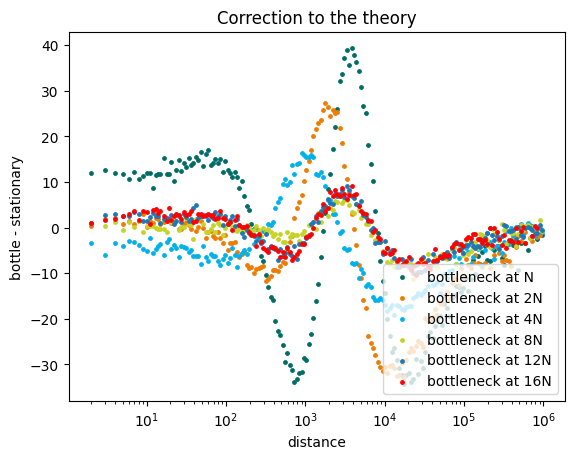

PyObject <matplotlib.legend.Legend object at 0x7f21c03f3550>

In [308]:
μ = 2.36e-8

y_th = map(x) do r 
    hid(pars, μ, r)
end
res = (y .- y_th) ./ errs
# res = y ./ y_th
x_ = x[(y .!= 0).&(x.>1e0)] 
y_ = res[(y .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="bottleneck at N", c="#006c66")

y_th = map(x) do r 
    hid(pars2, μ, r)
end
res = (y2 .- y_th) ./ errs2
# res = y2 ./ y_th
x_ = x[(y2 .!= 0).&(x.>1e0)]
y_ = res[(y2 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="bottleneck at 2N", c="#ef7c00")

y_th = map(x) do r 
    hid(pars3, μ, r)
end
res = (y3 .- y_th) ./ errs3
# res = y3 ./ y_th
x_ = x[(y3 .!= 0).&(x.>1e0)]
y_ = res[(y3 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="bottleneck at 4N", c="#00b1ea")

y_th = map(x) do r 
    hid(pars4, μ, r)
end
res = (y4 .- y_th) ./ errs4
# res = y4 ./ y_th
x_ = x[(y4 .!= 0).&(x.>1e0)]
y_ = res[(y4 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="bottleneck at 8N", c="#c6d325")

y_th = map(x) do r 
    hid(pars5, μ, r)
end
res = (y5 .- y_th) ./ errs5 
# res = y5 ./ y_th
x_ = x[(y5 .!= 0).&(x.>1e0)]
y_ = res[(y5 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="bottleneck at 12N")

y_th = map(x) do r 
    hid(pars6, μ, r)
end
res = (y6 .- y_th) ./ errs6
# res = y6 ./ y_th
x_ = x[(y6 .!= 0).&(x.>1e0)]
y_ = res[(y6 .!= 0).&(x.>1e0)]
scatter(x_, y_,s=6, label="bottleneck at 16N", c="red")

correction(x, tau) = exp(-4μ*tau*x) / (1 + exp(-2μ*tau*x))
# plot(x, correction.(x, meanN4))

# scatter(x_, y_,s=4)
# plot([1e0,1e8],[0,0],color="black",linestyle="--")
# plot([1e0,1e8],[3,3],color="grey",linestyle="--",label=L"\pm3\sigma",alpha=0.5)
# plot([1e0,1e8],[-3,-3],color="grey",linestyle="--",alpha=0.5)

title("Correction to the theory")
xscale("log")
# yscale("log")
xlabel("distance")
# ylim(-20,30)
# xlim(1e0,1e6)
ylabel("bottle - stationary")
legend(loc="lower right")

# savefig("correction_invariance_rescaled.pdf", bbox_inches="tight")

## random plot

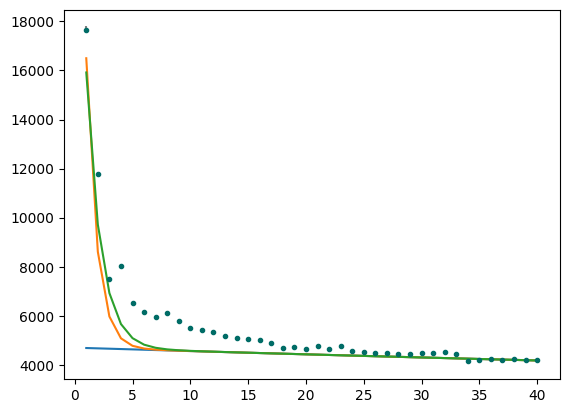

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc7c75da5f0>

In [47]:
h = HistogramBinnings.Histogram(LinEdgeVector(lo = 1, hi = 40, nbins = 40))
append!(h, data);
x, y = xy(h)
errs = sqrt.(h.weights)
# h2 = HistogramBinnings.Histogram(LinEdgeVector(lo = 1, hi = 10, nbins = 10))
# append!(h2, data2)
# x2, y2 = xy(h2)
# errs2 = sqrt.(h2.weights)

errorbar(x,y,errs,fmt="o",markersize=3,color="#006c66",ecolor="grey",label="data (HG02922)")
# errorbar(x2,y2/sum(h2.weights)*sum(h.weights),errs2,fmt="o",markersize=3,color="#ef7c00",ecolor="grey",label="data (HG02922)")

baseline(x) = 4.7e3/(1 .+1e-3*x).^3
plot(x, baseline.(x))
plot(x, 2.1e4*(3/4)^2*(1/3).^(x.-1) .+ baseline.(x))
plot(x, 2.5e4exp.(-0.8x) .+ baseline.(x))

# ylim(4000,20000)
# xscale("log")
# yscale("log")

# y .- y2/sum(h2.weights)*sum(h.weights)

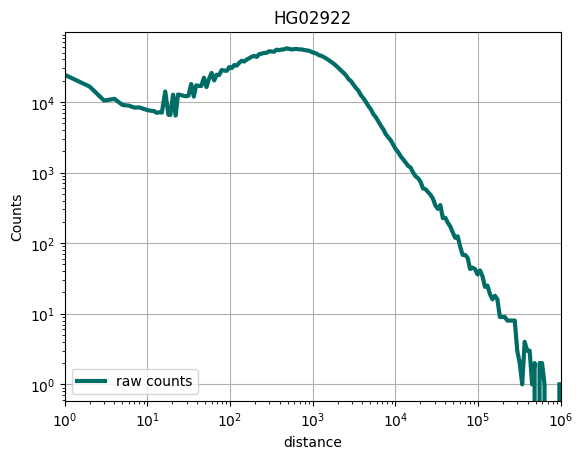

In [217]:
h = HistogramBinnings.Histogram(LogEdgeVector(lo = 1, hi = 1_000_000, nbins = 200))
append!(h, data);
x, y = xy(h)

plot(x,h.weights,linewidth=3,color="#006c66",label="raw counts")

title("HG02922")
xlabel("distance")
ylabel("Counts")

xscale("log")
yscale("log")
# ylim(5e-7,1e2)
xlim(1,1e6)
grid("major")
legend(loc="lower left")

# savefig("raw_counts.pdf", bbox_inches="tight")